In [10]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Plots; gr();

using AD_TGLFNN
using AD_EPEDNN
using Flux
using Dates

  Activating project at `~/Coding/julia/FUSE`


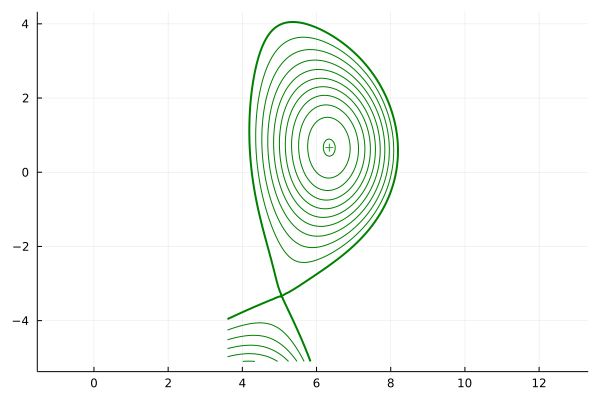

equilibrium.ids_properties was skipped in IMAS.jl data dictionary
 14.677688 seconds (76.89 M allocations: 3.694 GiB, 3.96% gc time, 97.66% compilation time)
(dd.equilibrium.time_slice[]).global_quantities.beta_tor = 0.026307920379013562
(dd.equilibrium.time_slice[]).global_quantities.beta_pol = 0.675885317337453
(dd.equilibrium.time_slice[]).global_quantities.beta_normal = 1.847795021838463
(dd.equilibrium.time_slice[]).global_quantities.ip = 1.5139726568416277e7


1.5139726568416277e7

In [2]:
if false
    ϵ = 0.48
    κ = 1.68
    δ = 0.21
    R0 = 6.2
    B0 = 5.3
    ip = 15.E6
    βn = 2.0
    x_point = (5.0, -6.5)
    symmetric=true

    resolution = 129

    dd = IMAS.dd()

    eqt=resize!(dd.equilibrium.time_slice,-1.0)[end]    
    eqt=resize!(dd.equilibrium.time_slice)[end]
    FUSE.init(dd.equilibrium; B0, R0, ϵ, δ, κ, beta_n=βn, ip, x_point=x_point)
    
    eqactor = FUSE.SolovevEquilibriumActor(dd, symmetric=symmetric)
    @time FUSE.step(eqactor,verbose=true)
    FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2), 0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2))
    eqt.global_quantities.li_3 = 1.0 # made up!
    eqt.global_quantities.magnetic_axis.b_field_tor = B0
    eqt.global_quantities.magnetic_axis.r = R0
elseif false
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","CAT_eq_ods.json")
    dd = IMAS.json2imas(filename);
    @time IMAS.flux_surfaces(dd.equilibrium);
    nothing
else
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","ITER_eq_ods.json")
    dd = IMAS.json2imas(filename);
    dd.equilibrium.time=[0.0]
    @time IMAS.flux_surfaces(dd.equilibrium);
    nothing
end
if true
    display(plot(dd.equilibrium.time_slice[], color=:green, psi_levels_out=[]))
    @show dd.equilibrium.time_slice[].global_quantities.beta_tor
    @show dd.equilibrium.time_slice[].global_quantities.beta_pol
    @show dd.equilibrium.time_slice[].global_quantities.beta_normal
    @show dd.equilibrium.time_slice[].global_quantities.ip;
end

In [42]:
FUSE.init(dd.core_profiles, dd.equilibrium, dd.summary; ne_ped=1e20, ne_peaking=1.5, Te_ped=500, Te_peaking=3, w_ped=0.08, zeff=2, Paux=2e6, n_points=101)
FUSE.init(dd.core_sources, dd.equilibrium; Paux_e=5e6, Paux_i=5e6)

source
｜[1]
｜｜identifier
｜｜｜description ➡ "Arbitrary source from FUSE transport initialization"
｜｜｜index ➡ 901
｜｜｜name ➡ "arb"
｜｜profiles_1d
｜｜｜[1]
｜｜｜｜electrons
｜｜｜｜｜power_inside ➡ 51-element Vector{Float64}
｜｜｜｜grid
｜｜｜｜｜rho_tor_norm ➡ 51-element LinRange{Float64, Int64}
｜｜｜｜｜volume ➡ 51-element Vector{Float64}
｜｜｜｜time ➡ 0.0
｜｜｜｜total_ion_power_inside ➡ 51-element Vector{Float64}
time ➡ 1-element Vector{Float64}


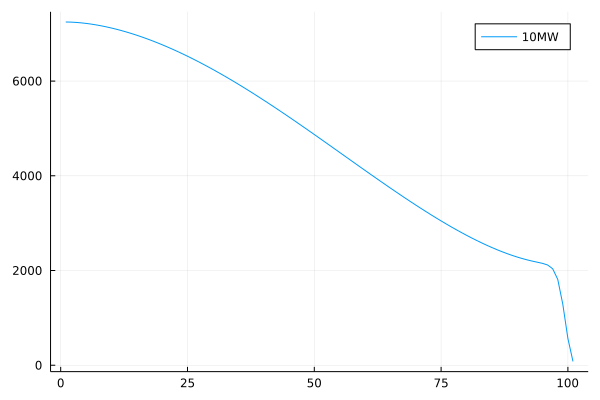

In [43]:
tauennactor = FUSE.TaueNNactor(dd)
try
    FUSE.step(tauennactor)
catch
    display(dd.core_sources)
    rethrow()
end

plot(dd.core_profiles.profiles_1d[].electrons.temperature, label="$(10)MW")

In [ ]:
# currently broken
if false

    using NNlib
    using Flux
    using Dates
    using AD_EPEDNN
    using AD_TGLFNN


    # run tauenn from standalone
    inputs = TauennInputs()
    inputs.q0= 1.2
    inputs.mixing = "dc"
    inputs.ngrid = 101
    inputs.delta = 0.45
    inputs.iterations=100
    inputs.rho_fluxmatch=0.6
    inputs.error=0.001
    #display(inputs)
    @time outputs = tau_enn(inputs; verbose=true);
    display(outputs)

    plot(outputs.ods.core_profiles.profiles_1d[1].electrons.temperature, label="$(inputs.Paux)MW")
end